In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

In [3]:
# image = cv2.imread('/home/pratiksha/PycharmProjects/building.jpg')
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

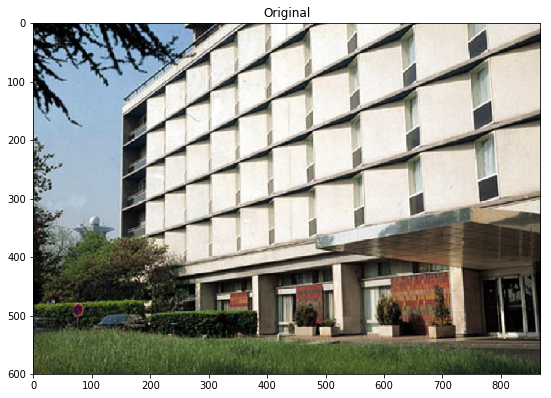

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

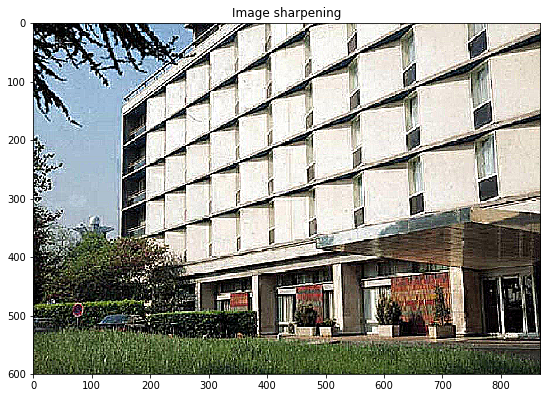

In [8]:
#kernel sharpening
kernel_sharpening = np.array([[-1,-1,-1],
                             [-1,9,-1],
                             [-1,-1,-1]])
#apply diffrenet kernels to differrent image 
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

plt.figure(figsize=(20,20))
plt.subplot(1 , 2, 1)
plt.title("Image sharpening")
plt.imshow(sharpened)
#plt.imsave(sharpened)
plt.show()

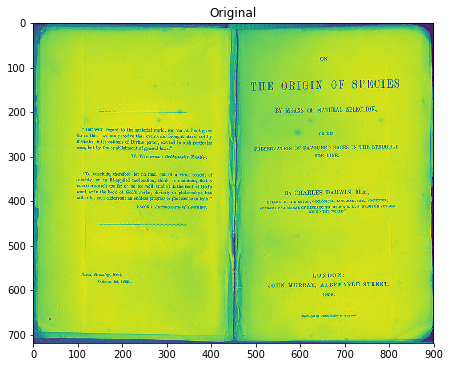

In [9]:
#thresholding,binarization &adaptive thresholding 
image = cv2.imread('/home/pratiksha/PycharmProjects/Origin_of_Species.jpg', 0)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

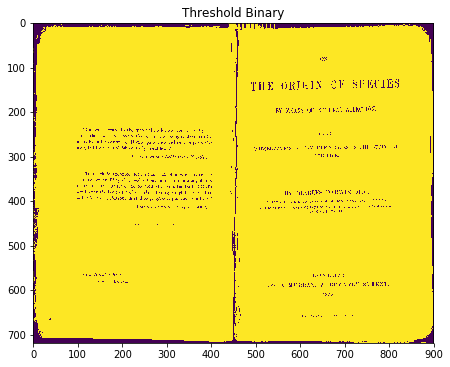

In [10]:
#values below 127 goes to black, everything above goes to 255, (white)
ret,thresh1 = cv2.threshold(image, 127, 255 , cv2.THRESH_BINARY)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)

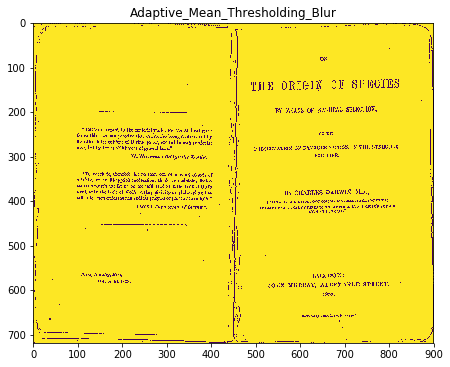

In [11]:
# while processing images Applying Guassian_Blur is good method as it removes Noise frm images
image = cv2.GaussianBlur(image, (3,3), 0)
#Applying Adaptive_threshold
thresh= cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 5)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 3)
plt.title("Adaptive_Mean_Thresholding_Blur")
plt.imshow(thresh)

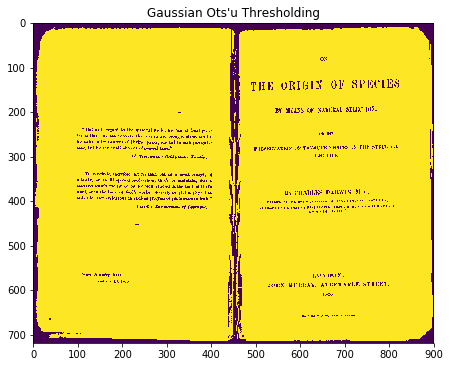

In [12]:
_,th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 4)
plt.title("Gaussian Ots'u Thresholding")
plt.imshow(th2)
plt.show()

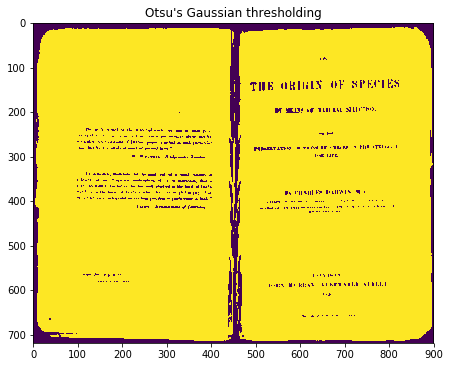

In [13]:
## Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 5)
plt.title("Otsu's Gaussian thresholding")
plt.imshow(th3)
plt.show()

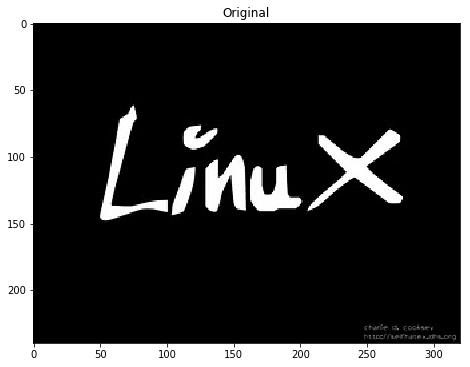

In [14]:
#Dialation, erosion & opening, closing
image = cv2.imread('/home/pratiksha/PycharmProjects/LinuxLogo.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.show()

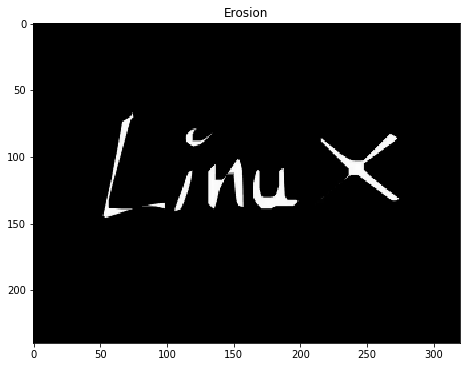

In [15]:
#lets define our kernel size
kernel = np.ones((5,5), np.uint8)
#now erode the image 
erosion = cv2.erode(image, kernel, iterations=1)
plt.figure(figsize=(20,20))
plt.subplot(3,2,2)
plt.title("Erosion")
plt.imshow(erosion)
plt.show() 

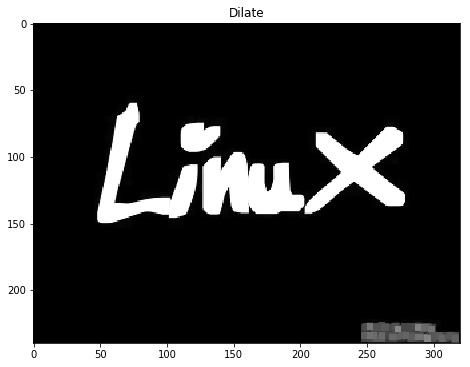

In [16]:
dilation = cv2.dilate(image , kernel, iterations = 1)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 3)
plt.title("Dilate")
plt.imshow(dilation)

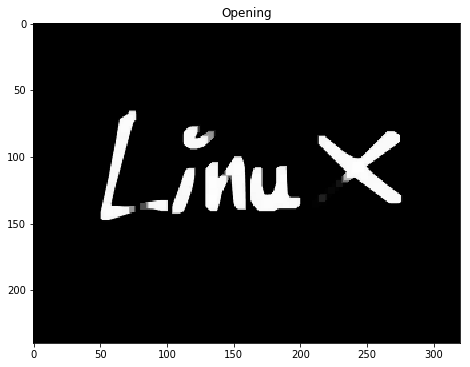

In [17]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)

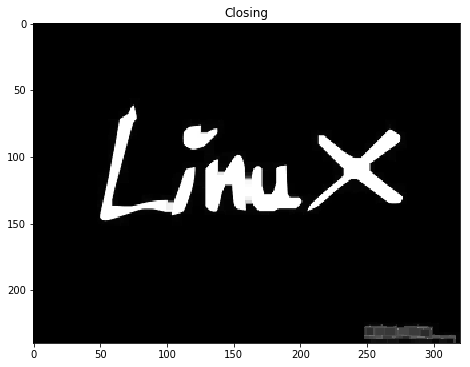

In [18]:
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)

## Sobel edge detection 
Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes.

The operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical. The picture below shows Sobel Kernels in x-dir and y-dir:

x-dir = [[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]
y-dir = [[1 , 2, 1],[ 0, 0, 0],[-1, -2, -1]]

### Laplacian edge detector

Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass.

A kernel used in this Laplacian detection looks like this:
kernel = ([ [0, 1, 0],
            [ 1, -4, 1],
            [0, 1, 0]
         ])

If we want to consider the diagonals, we can use the kernel below:
kernel = ([ [1, 1, 1], 
            [1, -8, 1],
            [1, 1, 1]
])




### Canny edge detection algorithm

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. 
Canny also produced a computational theory of edge detection explaining why the technique works.
The idea today is to build an algorithm that can sketch the edges of any object present on a picture, using t
he Canny edge detection algorithm.
The Canny edge detection algorithm is composed of 5 steps:

    1.Noise reduction;
    2.Gradient calculation;
    3.Non-maximum suppression;
    4.Double threshold;
    5.Edge Tracking by Hysteresis.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/pratiksha/anaconda3/lib/python3.6/site-packages/matplotlib/cm.py:273: RuntimeWarning: invalid value encountered in multiply
  xx = (xx * 255).astype(np.uint8)


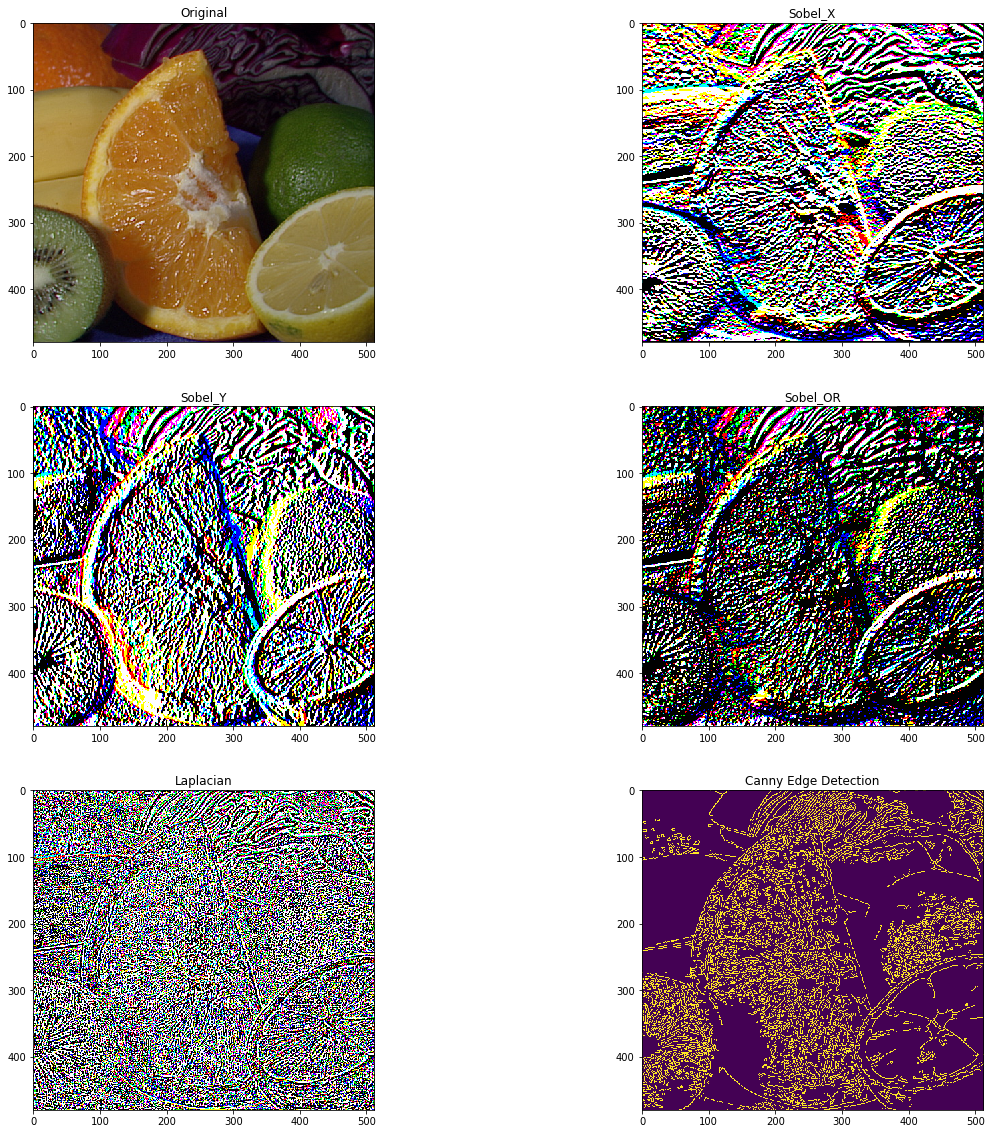

In [19]:
#Edge detection/Image Gradients
#loding image 
image = cv2.imread("/home/pratiksha/PycharmProjects/fruits.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height,width,_ = image.shape 
#extract sobel images  
#convolute with proper kernle 
sobel_x = cv2.Sobel(image, cv2.CV_64F,0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F,1, 0, ksize=5)

plt.figure(figsize=(20,20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image) 

plt.subplot(3, 2, 2)
plt.title("Sobel_X")
plt.imshow(sobel_x)

plt.subplot(3, 2, 3)
plt.title("Sobel_Y")
plt.imshow(sobel_y)
##convolute with proper kernle 
sobel_OR = cv2.bitwise_or(sobel_x,sobel_y)

plt.subplot(3, 2, 4)
plt.title("Sobel_OR")
plt.imshow(sobel_OR)

##convolute with proper kernle 
laplacian_ = cv2.Laplacian(image, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian_)
#plt.show()

#lets do Canny Edge detection algorithms
# Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
plt.subplot(3, 2, 6)
plt.title("Canny Edge Detection")
plt.imshow(canny)

plt.show()

### Scaling , re-sizing & interpolations 
Re-sizing is very easy using the cv2.resize function, its arguments 

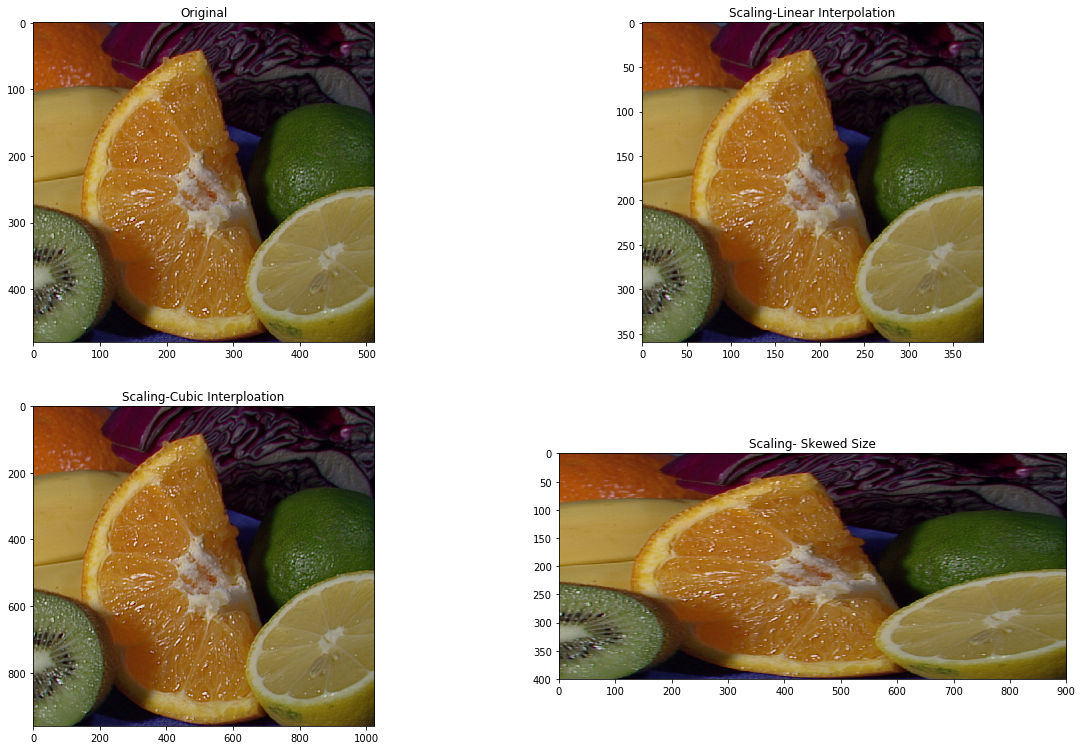

In [20]:
image = cv2.imread('/home/pratiksha/PycharmProjects/fruits.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
#1.Scaling
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75,fy=0.75)
plt.subplot(3, 2, 2)
plt.title("Scaling-Linear Interpolation")
plt.imshow(image_scaled)

#2.Re-sizing
img_resize = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.subplot(3, 2, 3)
plt.title("Scaling-Cubic Interploation")
plt.imshow(img_resize)
#3.Interpolation 
img_interpolate = cv2.resize(image, (900,400), interpolation = cv2.INTER_AREA)
plt.subplot(3, 2, 4)
plt.title("Scaling- Skewed Size")
plt.imshow(img_interpolate)

plt.show()


### IMAGE Pyramids - Making smaller/larger

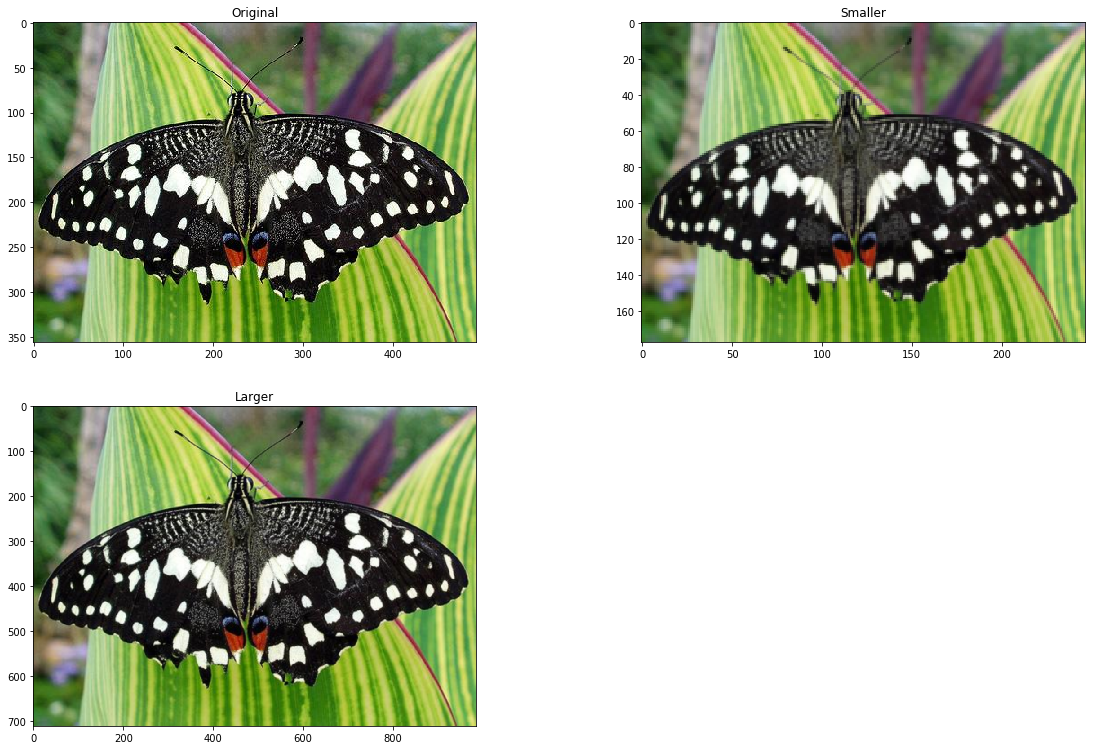

In [21]:
image = cv2.imread("/home/pratiksha/PycharmProjects/butterfly.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

smaller = cv2.pyrDown(image)
plt.subplot(3, 2, 2)
plt.title("Smaller")
plt.imshow(smaller)

larger = cv2.pyrUp(image)
plt.subplot(3, 2, 3)
plt.title("Larger")
plt.imshow(larger)
plt.show()

### Perspective Transform

In [22]:
image = cv2.imread("/home/pratiksha/PycharmProjects/scan.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

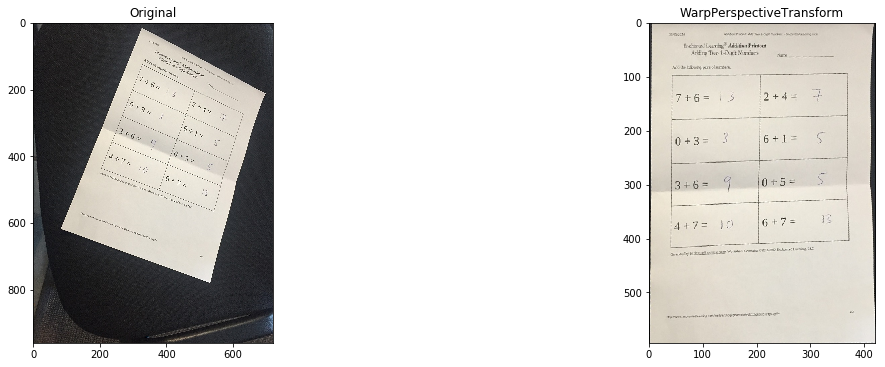

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
#coordinates of the 4 corners of image 
points_A = np.float32([[320,15],[700,215],[85,610],[530,780]])
points_B = np.float32([[0,0],[420,0],[0,594],[420,594]])
#use the two sets of four points to compute
M = cv2.getPerspectiveTransform(points_A,points_B)
warped = cv2.warpPerspective(image, M,(420,594))
plt.subplot(3, 2, 2)
plt.title("WarpPerspectiveTransform")
plt.imshow(warped)
plt.show()

### Cropping

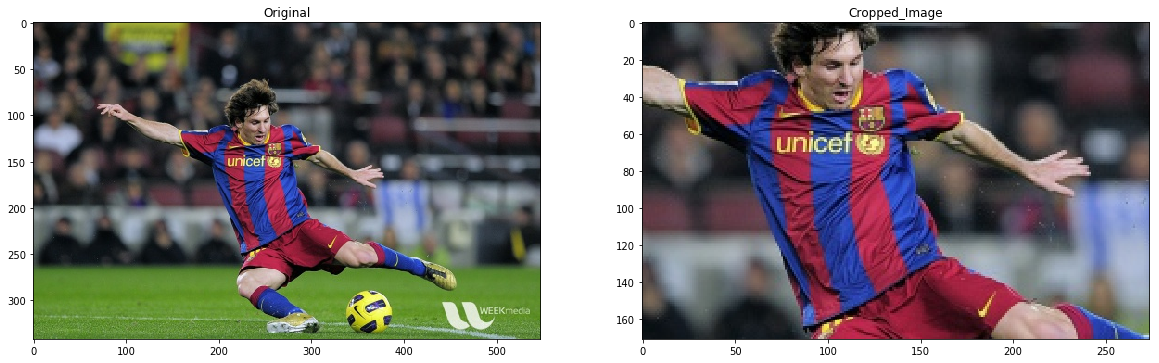

In [31]:
image = cv2.imread("/home/pratiksha/PycharmProjects/messi5.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
#plt.show()

height, width = image.shape[:2]
#lets get starting pixel co-ordinate,start with top left corner
start_row, start_col = int(height * .25), int(width * .25)
end_row, end_col = int(height * .75), int(width * .75)
#simpl use indexing to crop a rectangle
cropped = image[start_row:end_row, start_col:end_col]

plt.subplot(2, 2, 2)
plt.title("Cropped_Image")
plt.imshow(cropped)
plt.show()


In [ ]:
#blurring/finding corner/background subtraction methods/